<a href="https://colab.research.google.com/github/gowtham66866/Inkers/blob/master/Gowtham_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


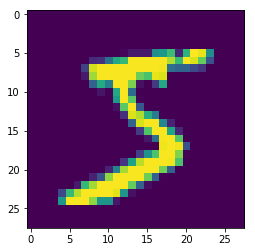

In [5]:
print (x_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [0]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Changes made:**
.

1.   Introduced BatchNormarlisation after every 3x3 conv layer.
2.   Changed Learning rate to 0.01 with decay rate at 0.0005.
3.  Introduced dropout of 0.15 after every 3x3 convolution layer, rather than having a concentrated large dropout at less number of places, we are using distributed dropout at every convolution layer. 

After training the model for 40 epochs, I managed to get an accuracy of 99.44% accuracy with 12,750 parameters. Which meets the requirement.




In [11]:
from keras.layers import Activation
from keras import regularizers
model = Sequential()

# input layer and the first conv layer 
model.add(Convolution2D(10, 3, 3,W_regularizer=regularizers.l2(0.0001), input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

# first conv block
model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 24
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(24, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 22
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

# first transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
# model.add(Dropout(0.1))

# second conv block
model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 9
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(24, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 7
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

# second transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

# Last conv block flowed by softmax
model.add(Convolution2D(10, 3, W_regularizer=regularizers.l2(0.0001))) # 1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 3, kernel_regularizer=<keras.reg...)`


In [0]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,decay=0.0005)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

train_iterator = datagen.flow(X_train, Y_train, batch_size=128)
test_iterator = datagen.flow(X_test, Y_test, batch_size=128)

In [0]:
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [15]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test))

model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, verbose=1, callbacks=[mcp_save], validation_data=test_iterator,
                    validation_steps=len(test_iterator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


469/469 [==============================] - 11s 23ms/step - loss: 0.1903 - acc: 0.9469 - val_loss: 0.0718 - val_acc: 0.9837
Epoch 2/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0817 - acc: 0.9806 - val_loss: 0.0634 - val_acc: 0.9849
Epoch 3/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0735 - acc: 0.9837 - val_loss: 0.0573 - val_acc: 0.9878
Epoch 4/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0683 - acc: 0.9852 - val_loss: 0.0609 - val_acc: 0.9871
Epoch 5/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0625 - acc: 0.9871 - val_loss: 0.0522 - val_acc: 0.9898
Epoch 6/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0621 - acc: 0.9874 - val_loss: 0.0571 - val_acc: 0.9890
Epoch 7/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0592 - acc: 0.9884 - val_loss: 0.0687 - val_acc: 0.9843
Epoch 8/40
469/469 [==============================] - 7s 14ms/step - loss: 0.05

In [0]:
model.load_weights(".mdl_wts.hdf5")

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.028513735942542553, 0.9946]


In [18]:
# score = model.evaluate(X_test, Y_test, verbose=0)
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),verbose=1)
print(acc)
print(len(test_iterator))

42/79 [==============>...............] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 0s 4ms/step
0.9949
79


### Find out 25 misclassified images from the validation dataset and create an image gallery
In the following code, first 25 wrongly predicted images are saved among the test set.
Of these wrongly classified examples are saved into a list of tuples. Each tuple will have three elements with image data tensor, predicted value and the actual values.

In the subsiquent cell, I will use the list of 25 wrong prediction **tuple** to plot and show image using **matplotlib**.

In [19]:
j,t = 0, 0
X_test_wrong = []
for i in range(len(X_test)):
  img_data = x_test[i].reshape(1, 28, 28,1)
  t += 1
  if np.argmax(model.predict(img_data)) != np.argmax(Y_test[i]):
    X_test_wrong.append((img_data, np.argmax(model.predict(img_data)), np.argmax(Y_test[i])))
    j += 1
  if j >= 25:
    break
print('totla false preds {} for samples {}'.format(j,t))


totla false preds 25 for samples 2415


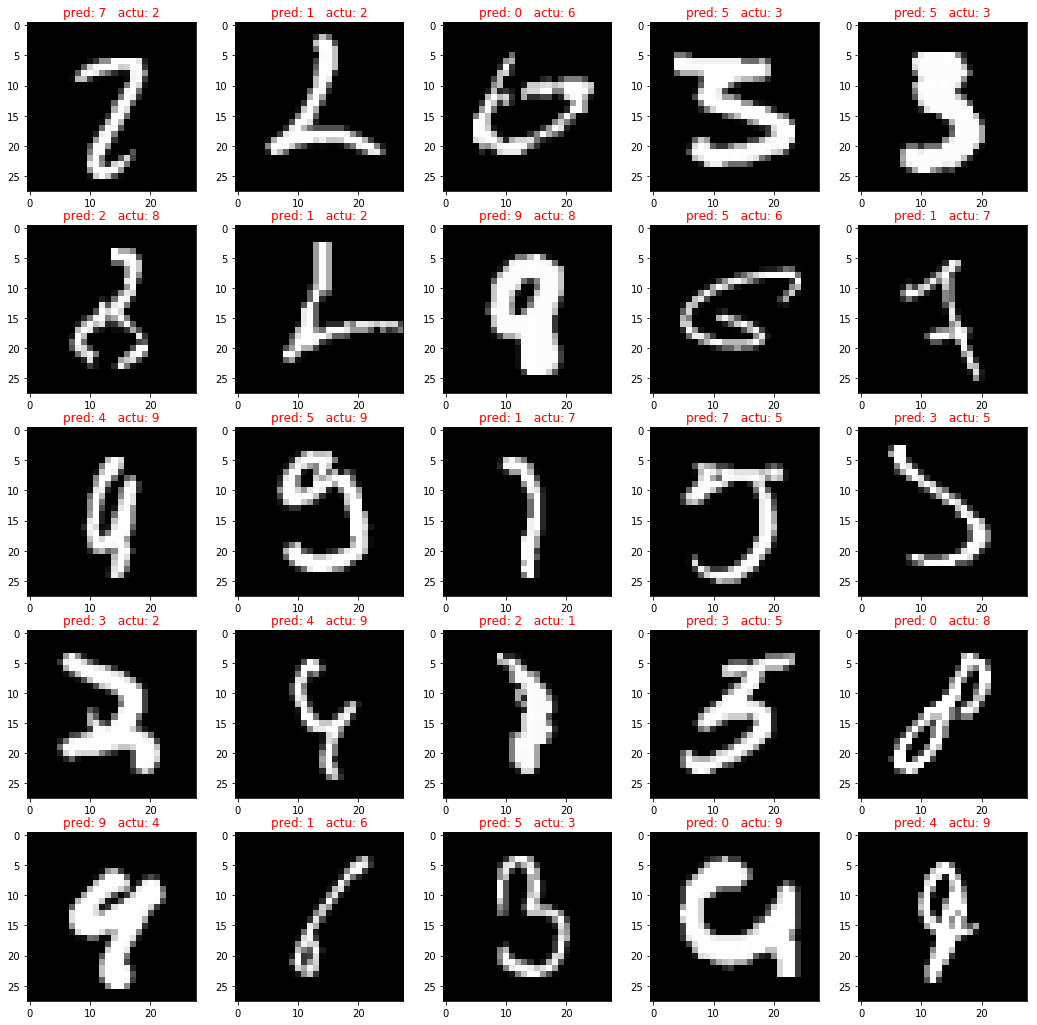

In [20]:
plt.figure(figsize=(18,18))
batch_size = 25
i = 0
for img in X_test_wrong:
  ax = plt.subplot(5,5,i+1)
  ax.set_title("pred: {}   actu: {}".format(img[1], img[2]), color='r')
  plt.imshow(np.reshape(img[0], (28,28)), cmap=plt.cm.gray)
  i += 1

In [0]:
y_pred = model.predict(X_test)

In [22]:
print(y_pred[:9])
print(y_test[:9])

[[6.1692319e-08 1.3016172e-07 7.9452411e-07 4.7068119e-07 3.8719776e-08
  1.2385089e-10 2.6568500e-10 9.9999833e-01 4.1689456e-09 1.8023457e-07]
 [5.1826686e-05 2.4245848e-05 9.9992263e-01 2.4919299e-07 2.0071331e-08
  1.0659264e-10 5.7581821e-07 1.6547055e-07 3.8282997e-07 1.3230609e-08]
 [1.8301162e-06 9.9986267e-01 4.7192862e-06 9.1559222e-08 9.1421025e-06
  5.7279531e-06 2.4389499e-05 8.0382444e-05 1.1646124e-06 9.9211138e-06]
 [9.9997652e-01 9.5341248e-13 4.1842874e-08 1.0238046e-09 5.9889924e-09
  1.9833482e-09 1.3450167e-05 4.0060528e-09 1.3222346e-07 9.9078125e-06]
 [3.9322309e-10 8.8588550e-09 1.3601880e-09 2.0685822e-10 9.9999511e-01
  6.9377459e-10 1.2031404e-08 1.3684032e-09 5.7311076e-09 4.9063115e-06]
 [1.1844352e-06 9.9978882e-01 6.3376278e-06 1.0289550e-08 3.3599647e-06
  4.2616861e-07 1.5941199e-05 1.7926702e-04 2.6967544e-07 4.4148219e-06]
 [6.3244158e-12 1.0669175e-06 1.0547612e-06 1.5636742e-09 9.9950850e-01
  5.3982911e-09 3.6437786e-10 3.9578808e-06 2.1279227e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored